# Clustering jerárquico

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

## Generación de datos de ejemplo
Generamos unas cuantas distribuciones para trabajar con un ejemplo básico de clusterización

(750, 2)


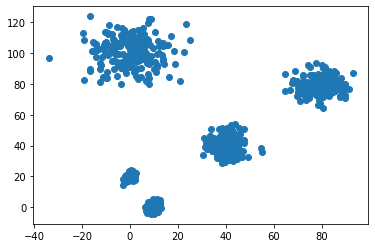

In [2]:
np.random.seed(700)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])

data = np.concatenate((a,b,c,d,e))
print(data.shape)

plt.scatter(data[:,0], data[:,1])
plt.show()

## Matriz de enlace

In [3]:
link_matrix = linkage(data, "ward") 
# usamos ward por ejemplo pero existen otros: simple, completo, promedio, centroide, o establecer la distancia (manhattan, etc.)

link_matrix

array([[9.00000000e+00, 5.00000000e+01, 1.66320405e-02, 2.00000000e+00],
       [5.31000000e+02, 5.46000000e+02, 2.31814656e-02, 2.00000000e+00],
       [1.56000000e+02, 2.76000000e+02, 3.18937892e-02, 2.00000000e+00],
       ...,
       [1.49000000e+03, 1.49500000e+03, 6.17551024e+02, 3.50000000e+02],
       [1.49200000e+03, 1.49400000e+03, 1.16149014e+03, 4.00000000e+02],
       [1.49600000e+03, 1.49700000e+03, 1.27877768e+03, 7.50000000e+02]])

## Evaluación
Usamos el coeficiente de correlación cofenetico

Calculamos la distancia 2 a 2 de nuestras muestras con las del clustering jerarquico.
Cuanto más cercano sea a 1, mejor estará conservando las distancias originales.


In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, cophenet_dist = cophenet(link_matrix, pdist(data))
c

0.8805983154752901

## Dendrograma

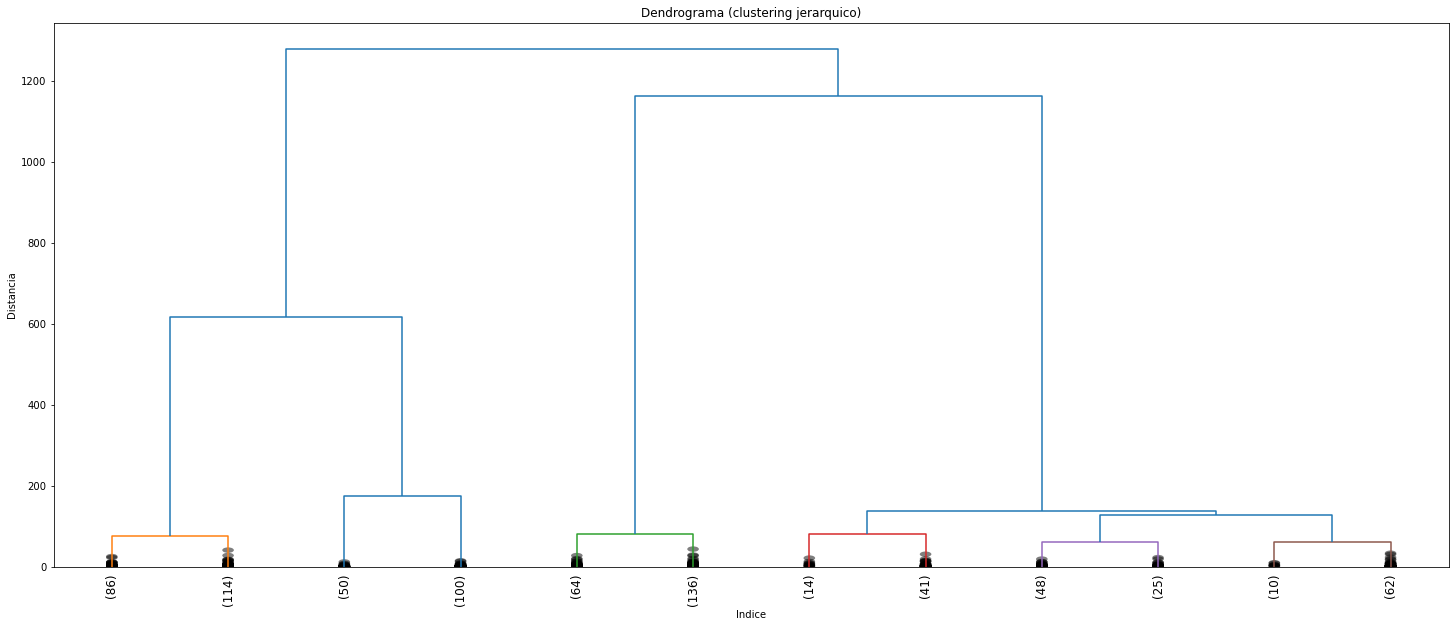

In [6]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma (clustering jerarquico)")
plt.xlabel("Indice")
plt.ylabel("Distancia")

## Sin truncar hojas
##dendrogram(link_matrix, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)

## Truncando hojas
dendrogram(link_matrix, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)

plt.show()

## Cortar el dendrograma
### Método del codo

Segun el método del codo, el número óptimo de clusters es 4, pero la intuición viendo el dendrograma nos dice que son 5


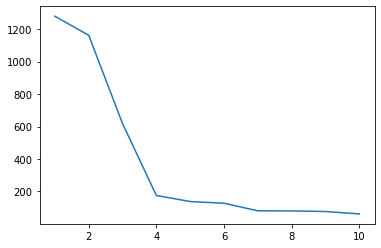

In [7]:
last = link_matrix[-10:,2] # cogemos los ultimos diez elementos
last_inverted = last[::-1] # invertimos el orden

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_inverted)

print("Segun el método del codo, el número óptimo de clusters es 4, pero la intuición viendo el dendrograma nos dice que son 5")

#### Evaluar la inconsistencia

Evalua la relación entre la altura de cada unión en función de la altura del resto de uniones.

In [8]:
from scipy.cluster.hierarchy import inconsistent

In [23]:
depth = 5 # cuantos niveles de profundidad anteriores al cluster se usarán para calcular la desviación de alturas en los cluster
inconsistencia = inconsistent(link_matrix, depth)
inconsistencia[-5:]

## Nos dice:
### El promedio
### La desviacion estandar
### El número de elementos
### El factor de inconsistencia para cada unión



array([[ 35.22904557,  33.06401646,  28.        ,   3.11111062],
       [ 12.35797159,  32.3141552 ,  28.        ,   5.0420941 ],
       [ 43.3134854 , 113.27457617,  30.        ,   5.06943003],
       [ 78.61240204, 207.00127098,  30.        ,   5.23126131],
       [143.42713057, 307.81449789,  31.        ,   3.68842455]])

In [22]:
print("Observamos que no hay tanta diferencia de un 5.04 a un 5.06 de incosistencia, podemos permitirnos agregar un 5 cluster")

Observamos que no hay tanta diferencia de un 5.04 a un 5.06 de incosistencia, podemos permitirnos agregar un 5 cluster


## Identificar los elementos de los clusters

In [10]:
from scipy.cluster.hierarchy import fcluster

In [24]:
link_matrix[-5:]
#Observamos los ultimos enlaces, y vemos que el 4 cluster tiene una altura de 175, y el 5 de 138. 

array([[1491.        , 1493.        ,  138.09485824,  200.        ],
       [1451.        , 1464.        ,  175.28898288,  150.        ],
       [1490.        , 1495.        ,  617.55102393,  350.        ],
       [1492.        , 1494.        , 1161.49014226,  400.        ],
       [1496.        , 1497.        , 1278.77768018,  750.        ]])

In [17]:

max_distance = 175

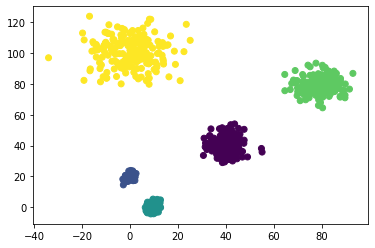

In [18]:
clusters = fcluster(link_matrix, max_distance, criterion="distance")
clusters

plt.scatter(data[:,0], data[:,1], c = clusters)
plt.show()